## Section I, using min cost mex flow graph appoarch

## Section II, using the NRMP appoarch for the additonal question

### First I will briefly explain how the NRMP algoritm works. 
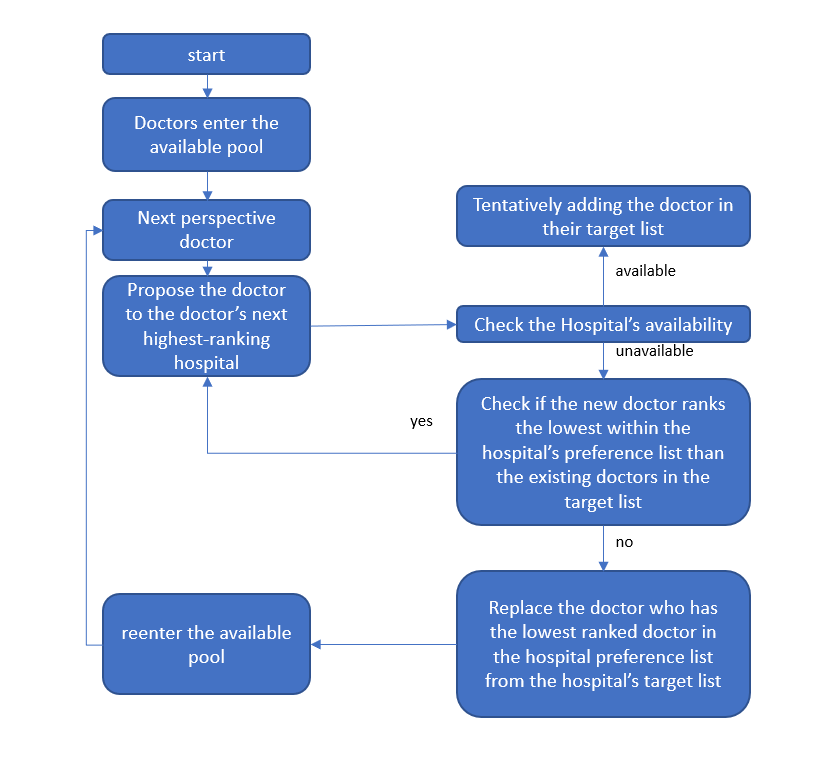

1, The doctor and the hospital will first implement it's preference list <br>
2, Doctors will enter a avaible pool<br>
3, The system will propose the doctor to it's next highest ranking hospital <br>
4, The hospital will check if the doctor runs the lowest preference in it's target list. <br>
5, If the doctor does ranked as the lowest, the system will try to propose the doctor to his/her next highest ranking hospital. <br>
6, if the doctor ranked higher in the hospital's target list, the system will remove the lowest ranking doctor in the hospital's target list to make room for the current doctor. The removed doctor will reenter the available pool. <br>
7, The system will keep running until all doctors leave the avaible pool. <br> 

In [ ]:

'''
Assuming that:
1, every doctor ranks every hospital in their preference list
2, every hospital ranks every perspective doctors in their preference list
3, input of the doctors perference is in the format of (doctors*hospitals)
4, input of the hospital perference is in the format of (hospitals*doctors)
5, the output is in the format of #hospitals lists of list containing the admission result 

'''
import math
import numpy as np


######################################################################################################
#                                       Algorithm design                                             #
######################################################################################################   

'''
This is a method that checks if there is a higher ranking doctor in the hospital's tentative acceptence list


input: 
    Doctor_Id: the doctor id of the new coming doctor 
    Hospital_Id: the new coming doctor's choise of hospital

output:
    status: 
        0: there is an replaced doctor 
        -1: there is no replaced doctor 
        -2: the exisitng doctors in the hospital target list all rank higher than the new coming doctor 
'''
# check if there's a higher ranked docter in the hospital target list 
# Doctor Id and Hospital Id must start from 1 
def higher_ranker_check(Doctor_Id, Hospital_Id, Hospital_target_list):
    # if the list is empty or have avalible space add the doctor in the target list 
    if len(Hospital_target_list[Hospital_Id -  1]) == 0 or len(Hospital_target_list[Hospital_Id -1 ]) < Hospital_cap:
        Hospital_target_list[Hospital_Id -1 ].append(Doctor_Id) 
        Doctor_is_occupied_list[Doctor_Id-1] = True # set the docters status as occupied
        return -1 # -1 means there's no replaced doctor in record 
    else:
        # if the hospital list is full
        replaceble_doctor_list = []
        replaceble_doctor_Id = None
        # finding the replaceble doctor's ID 
        for doctor_ID_in_hospital_list in Hospital_target_list[Hospital_Id -1 ]:
            # if an exisiting doctor in the list ranks shorter than the new coming doctor, the existing doctor will be move to the replaceble list
            if Hospital_Rank[Hospital_Id -1 ].index(doctor_ID_in_hospital_list) > Hospital_Rank[Hospital_Id-1].index(Doctor_Id):
                #replaceble_doctor_Id = doctor_ID_in_hospital_list
                # if the replacable_doctor_list is empty and the replaceble doctor's ID
                if len(replaceble_doctor_list) == 0:
                    replaceble_doctor_Id = doctor_ID_in_hospital_list
                    replaceble_doctor_list.append(replaceble_doctor_Id)
                else: 
                    # find the shortest ranking replaceble doctor
                    if Hospital_Rank[Hospital_Id -1 ].index(doctor_ID_in_hospital_list) > Hospital_Rank[Hospital_Id -1 ].index(replaceble_doctor_Id):
                        replaceble_doctor_Id = doctor_ID_in_hospital_list
                        replaceble_doctor_list[0] = replaceble_doctor_Id
        # if there is a replaceble doctor in the hospital's target list
        if replaceble_doctor_Id is not None:
            Hospital_target_list[Hospital_Id -1 ].remove(replaceble_doctor_Id) # remove the replaced docter ID from the target list 
            Doctor_is_occupied_list[replaceble_doctor_Id-1] =False # set the replaced doctor status as available
            Hospital_target_list[Hospital_Id -1].append(Doctor_Id) # add the new doctor's ID in the list
            Doctor_is_occupied_list[Doctor_Id-1] = True # set the docters status as occupied
            return 0 # 0 indicates there are replaced doctor in the record
        else: 
            return -2 # -2 indicates that the exisitng doctors in the hospital target list all rank higher than the new coming doctor



'''
This is the main running function that runs the algorithm


input: 
    1, Doctor_is_occupied_list: a list of the occupation status for each doctor
        Ture: this doctor has been reserved by certain hospital
        False: this doctor has no hospital reserved him/her yet
    2, num_doctor: number of perspective doctor 
    3, Doctor_Rank: a list for each doctor's hospital perfrence ranking
    4, Hospital_target_list: Hospital's tentative acceptance list
output:
    1, Hopital_final_list: Hospital's final acceptance list
'''

def run(Doctor_is_occupied_list, num_doctor, Doctor_Rank, Hospital_target_list):
    while all(Doctor_is_occupied_list) == False:
        for i in range(num_doctor):
            if Doctor_is_occupied_list[i] == False:
                Doctor_Id = i+1
                Doctor_Hospital_choice = Doctor_Rank[i][0]
                status = higher_ranker_check(Doctor_Id, Doctor_Hospital_choice, Hospital_target_list)
                del Doctor_Rank[i][0] # remove it's perfernece once submitted
                # if the submission is rejected by the hosipital and the doctor still has a perfernece, try the next perference hoispital
                while status == -2 and len(Doctor_Rank[i]) !=0: 
                    Doctor_Hospital_choice = Doctor_Rank[i][0]
                    status = higher_ranker_check(Doctor_Id, Doctor_Hospital_choice, Hospital_target_list)
                    del Doctor_Rank[i][0] #remove it's perfernece once submitted
                if status == -2 and len(Doctor_Rank[i])==0:
                    Doctor_is_occupied_list[i] = None
                
                
    for i in range(len(Hospital_target_list)):
        print('Hospital #: ' + str(i+1) + ' accepted doctor list is: ')
        print(Hospital_target_list[i])
    return Hospital_target_list

Now lets run this algorithm

In [ ]:
######################################################################################################
#                                       Algorithm example run                                        #
######################################################################################################   
# define constants 
'''
Test test example
'''
num_doctor = 10
num_Hospital = 4
Hospital_cap = math.ceil(num_doctor/num_Hospital)
Doctor_Rank = [[1,2,3,4],[3,2,1,4],[4,1,3,2],[3,2,4,1],[3,1,4,2],[3,1,2,4],[4,3,2,1],[3,2,1,4],[2,1,3,4],[1,3,4,2]]
Hospital_Rank = [[1,2,3,4,5,6,7,8,9,10],[2,1,4,3,5,10,9,6,8,7],[6,2,1,3,5,4,7,10,9,8],[5,4,3,2,1,10,9,8,7,6]]
Doctor_is_occupied_list = [False]*num_doctor

Hospital_target_list = [[] for _ in range(num_Hospital)] 


# running the algrothim
Hospital_confirmed_list = run(Doctor_is_occupied_list, num_doctor, Doctor_Rank, Hospital_target_list)